# Dataset: Breast Cancer Wisconsin (Diagnostic)

In this notebook, we will use the **Breast Cancer Wisconsin (Diagnostic) dataset**, contributed by the University of Wisconsin and widely cited in machine learning literature. The dataset was donated on **October 31, 1995**, and is available through the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

This dataset contains **569 samples** described by **30 real-valued features** derived from **digitized images of fine needle aspirate (FNA) tests** of breast masses. These features describe characteristics of **cell nuclei** present in the images. The task is to classify tumors as **malignant (M)** or **benign (B)**.

<br>
<div align="center">
    <img src="attachment:cancer_cells.jpg" width="300">
</div>

<br>



---

## Dataset Information

- **Data Type:** Tabular (numerical / real-valued)
- **Subject Area:** Health and Medicine
- **Associated Task:** Classification
- **Feature Type:** Real (continuous)
- **Number of Samples:** 569
- **Number of Features:** 30
- **Target Classes:**
  - `M`: Malignant
  - `B`: Benign


# Python Libraries

To build and evaluate Machine Learning (ML) models, we will use the `scikit-learn` or `sklearn` library (https://scikit-learn.org/stable/) for classification tasks.

The Docker image running this notebook has **scikit-learn version 1.6.1** installed. The corresponding documentation can be found (https://scikit-learn.org/1.6/getting_started.html).

Additionally, we will use the following libraries:
- `pandas` and `numpy` for data handling.
- `matplotlib` and `seaborn` for data visualization.

#  Data Loading

We start by importing the necessary libraries and downloading the dataset. We need to install the `ucimlrepo` package to easily download the data we need. In a jupyter cell, you can start typing an exclamation mark `!` to run shell commands. We will use the `pip` command to install the package.

In [ ]:
! pip install ucimlrepo

Once the package is installed, we can import it and use it to download the dataset. The `ucimlrepo` package provides a convenient way to access datasets from the UCI Machine Learning Repository.
*Note: In collab, you will need to install this package whenever you start a new session.*

In [ ]:
# Some packages we are going to use:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
data = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

#Check the first few rows
data.head()
y.head()


,Diagnosis
0,M
1,M
2,M
3,M
4,M


# Exploratory data analysis

Before applying specific machine learning methods, it is common to start a data science project with an **exploratory data analysis (EDA)**.

First, we use some functions to display the dataset size and basic information about its columns.

In [13]:
# Display dataset size
print("Dataset size: ", data.shape)

# Separator for readability
print('\n', '**' * 50, '\n')

# Display dataset information
data.info()

# Another separator
print('\n', '**' * 50, '\n')

# Generate descriptive statistics for numerical and categorical features
data.describe(include='all')

Dataset size:  (569, 30)

 **************************************************************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 n

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Next, we check whether any columns contain missing values.


In [14]:
# Check for missing values in the dataset
print("Missing values in each column:")
print(data.isnull().sum())


Missing values in each column:
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64


What do these values mean? These measurements describe groups of cell nuclei that come either from a benign or malignant sample, as seen through microscopy imaging. We will not get into details, as we are interested on understanding the different classification algorithms. For more info check the [original paper](https://www.semanticscholar.org/paper/Nuclear-feature-extraction-for-breast-tumor-Street-Wolberg/53f0fbb425bc14468eb3bf96b2e1d41ba8087f36).

For each nucleus characteristic (e.g., radius, texture, area), three statistical summaries are provided to capture:

1. Mean (e.g., area1): Average value of the feature across all nuclei in the sample.
2. Standard Error (e.g., area2) of the mean.
3. "Worst" Value (e.g., area3): Largest value observed.

Now, we check the number of samples per class in the target variable.






In [ ]:
print("Number of samples per class:")
print(y['Diagnosis'].value_counts())

Number of samples per class:
Diagnosis
B    357
M    212
Name: count, dtype: int64


As we can see, the dataset is slightly imbalanced, with more samples in the Diagnosis. Using the graphical libraries Seaborn (https://seaborn.pydata.org/) and Matplotlib, we will create a histogram to visualize this distribution.

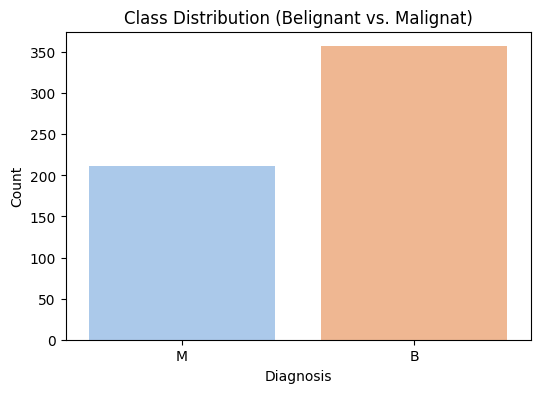

In [ ]:
# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y['Diagnosis'], hue=y['Diagnosis'], palette="pastel", legend=False)
plt.title("Class Distribution (Belignant vs. Malignat)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

### Analyzing Feature Distributions by Diagnosis

All remaining features in the dataset are **real-valued**, so we will use **histograms with KDE (kernel density estimation)** to analyze how selected features differ across the two classes:

- **B**: Benign
- **M**: Malignant

This allows us to visually compare the distribution of key features and observe whether certain measurements are more associated with one diagnosis than the other.


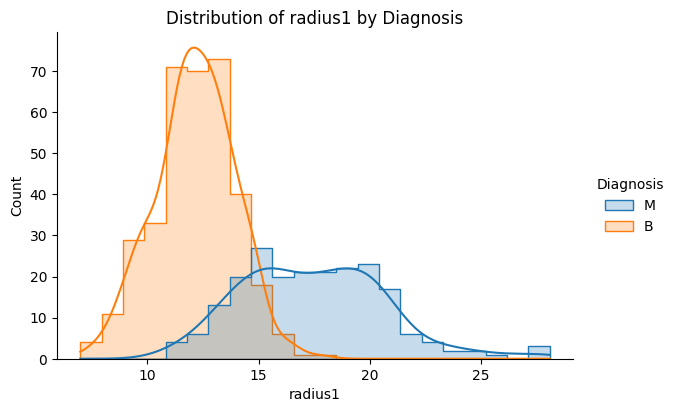

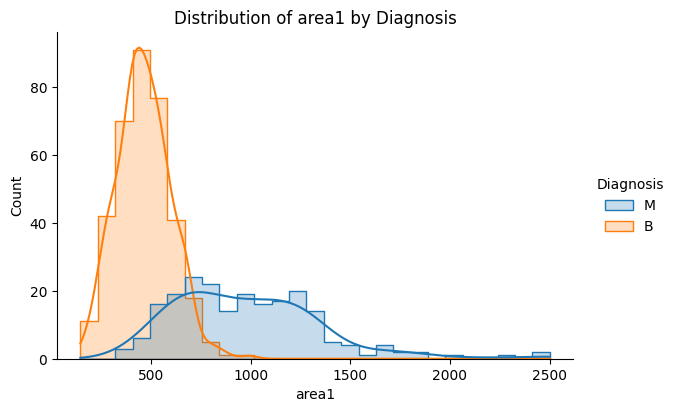

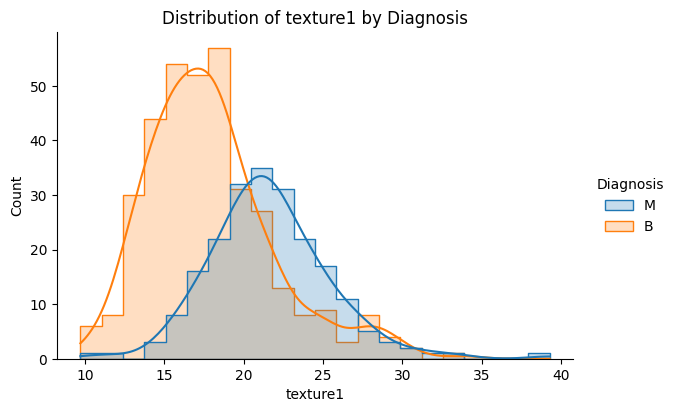

In [ ]:
# Select a few key features for distribution comparison
selected_features = ['radius1', 'area1', 'texture1']

# Plot histograms grouped by diagnosis
for feature in selected_features:
    sns.displot(data=data, x=feature, hue=y['Diagnosis'], kde=True, element='step', height=4, aspect=1.5)
    plt.title(f"Distribution of {feature} by Diagnosis")
    plt.show()

# - You may modify the `selected_features` list to explore other variables as well.


### Train-Test Split

First, we will separate the original dataset (`data`) into:

- **`X`**: A DataFrame containing the **predictor variables** (all real-valued features).
- **`Y`**: A Series containing the **target variable** (`diagnosis`), which indicates whether the tumor is **benign (B)** or **malignant (M)**.


In [ ]:
# Display dataset size
print("Dataset size (samples x variables):", data.shape)

# Define predictor variables
X = data.copy()

# Define target variable
Y = y.copy()

# Display shapes of X and y
print("X shape:", X.shape)
print("Y shape:", Y.shape)


Dataset size (samples x variables): (569, 30)
X shape: (569, 30)
Y shape: (569, 1)


Next, we load the **train-test split function** from `sklearn`, which allows us to divide the dataset into **training** and **testing** sets. We also define a variable, **`random_state`**, which sets the seed for generating random values. This ensures that we always get the **same train-test split** every time the code is executed.

Pay attention to the parameters:
- **`test_size`**: Specifies the percentage of data allocated for testing.
- **`stratify`**: Ensures that the class distribution is maintained across both train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split
# Set random seed
random_state = 2024

# Perform train-test split (70% training, 30% testing)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.3,      # 30% test data
    stratify=Y,
    random_state=random_state
)

# Print dataset sizes
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (398, 30)
Test set size: (171, 30)


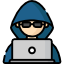

<br>
<span style="color:blue"><b>Exercise</b></span>.

a) Show the number of samples in each class for train and test sets. Make a Barplot where you compare the number of samples per class, for each of the train and test sets.

b) Check the proportions of samples per class has been preserved in the train and test set. Compare these to the original, unsplit data.

# Binary Classifications

## Logistic Regression

We are going to use the **Logistic Regression** we have seen in the slides to train a classifier that distinguishes between the 'Benign' and 'Malignant' samples.

This is already implemented in the `LogisticRegression` of `sklearn`.

In [ ]:
from sklearn.linear_model import LogisticRegression

Once we know which model we want to use, we need to initialize it. This step creates an empty model with a priori random parameters. To initialize the model, we just call it as if it were a function `LinearRegression()` and we give it a shortcut-name, usually `model`:

In [ ]:
logistic_model = LogisticRegression(max_iter=10_000)

Remember what's the scheme of thought in Machine Learning?

1. Perform an estimation
2. Minimize the estimation error/loss
3. Quality control

The method `.fit()` basically performs the first two steps. In supervised learning, we need to pass two arguments to it:
* the data (x values)
* its labels (in the case of a regression, the 'labels' are the y values)

Running the fit method we estimate the optimal parameters for the linear equation.

In [ ]:
logistic_model.fit(X_train, Y_train.squeeze()) # We use squeeze so the model will not complain about data shapes

In [ ]:
# Evaluate the model
Y_pred = logistic_model.predict(X_test)

The last step is to evaluate our model predictions. To do so we are going to introduce the confusion matrix. This is a table that summarizes the performance of a classification model by comparing the predicted labels with the true labels. The confusion matrix has four entries:
* True Positives (TP): the number of instances that were correctly predicted as positive.
* True Negatives (TN): the number of instances that were correctly predicted as negative.
* False Positives (FP): the number of instances that were incorrectly predicted as positive.
* False Negatives (FN): the number of instances that were incorrectly predicted as negative.

The confusion matrix is a very useful tool to evaluate the performance of a classification model. It allows us to see how many instances were correctly classified and how many were misclassified. It also allows us to see which classes are being confused with each other.


In [ ]:
 # Confusion matrix:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion = confusion_matrix(Y_test, Y_pred,)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The way the confusion matrix is organized depends on convention. `sklearn` documentation tells us that the results can be extracted as follows:

In [ ]:
tn, fp, fn, tp = confusion.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

From these values, we can use the formulas of the metrics we are interested in. The most common metrics for binary classification are:
* **Accuracy**: the proportion of correct predictions (TP + TN) / (TP + TN + FP + FN)
* **Precision**: the proportion of true positive predictions (TP) / (TP + FP)
* **Recall**: the proportion of true positive predictions (TP) / (TP + FN)
* **F1 Score**: the harmonic mean of precision and recall (2 * (precision * recall) / (precision + recall))


In [ ]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")
print(f"Accuracy: {accuracy:.2f}")

A much faster way to get the most important metrics is to use the `classification_report` function from sklearn. It gives us the precision, recall and f1-score for each class, as well as the support (number of instances) for each class, the model's accuracy and the macro and weighted averages of the metrics.

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred)
print(report)

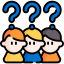

**Question**. In the classification report, there is a pair of metrics for every class, e.g., there are two precisions, one for the Benign tumors and one for the Malignant tumors. What is the difference between the two? Think in terms of the confusion matrix.

## Decision Tree Classifier

Next, we will train and evaluate a **Decision Tree Classifier**, a popular and interpretable model for classification tasks. In Scikit-learn, this algorithm is available through the `DecisionTreeClassifier` class. You can refer to the official documentation [here](https://scikit-learn.org/1.3/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details on available parameters and functionality.

To ensure reproducibility of results, we will set a fixed `random_state`. This allows us to consistently obtain the same tree structure and performance metrics each time the code is run, which is especially useful when tuning hyperparameters or comparing models.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Initialize and train Decision Tree
dt = DecisionTreeClassifier(random_state=random_state)
dt.fit(X_train, Y_train)

# Make predictions and evaluate
dt_prediction = dt.predict(X_test)
print('Decision Tree accuracy = {:0.3f}'.format(metrics.accuracy_score(Y_test, dt_prediction)))

One of the greatest advantages of decision trees is that they provide a set of **interpretable rules** that help us understand how predictions are made. Unlike many machine learning models, decision trees do not operate as black boxes; instead, they offer a transparent logic based on feature thresholds and conditions.

Additionally, decision trees can be **visualized**, either in text or graphical form, making them particularly useful for explanation and communication of model behavior. As a first step, we will create a **text-based representation** of the decision tree using Scikit-learn’s `tree.export_text` function. This will allow us to view the hierarchy of decisions and understand how the model splits data based on different features.

In [ ]:
from sklearn import tree

text_representation = tree.export_text(dt, feature_names = data.columns.tolist())
print(text_representation)


### Interpreting the Decision Tree Classifier

The decision tree above uses a series of binary decisions based on different clinical features to classify tumors as either **benign (B)** or **malignant (M)**. At each node, the tree checks whether a specific feature is below or above a threshold value and splits accordingly. The process continues until a terminal node is reached, which provides the predicted class.

The first split is based on the `area3` (worst area) feature. If `area3` is less than or equal to 884.55, the tree follows the left branch; otherwise, it goes right. This shows that `area3` is considered a very important feature in determining malignancy.

Subsequent splits refine the classification using additional features such as `concave_points3`, `area2`, `smoothness2`, and `texture3`. For example, if `area3 <= 884.55` and `concave_points3 <= 0.13`, the tree checks `area2`. If `area2 <= 36.47` and `smoothness2 <= 0`, then it evaluates `texture3` to make a final decision.

Interestingly, in several branches, features like `symmetry3`, `radius3`, `texture3` are used to guide the decision.

On the other side of the tree (when `area3t > 884.55`), decisions are influenced by `texture1`, `symmetry1`, `perimeter2`, and `smoothness3`. These deeper branches reflect more nuanced conditions where combinations of features are used to distinguish between benign and malignant diagnoses.

Overall, the decision tree provides a transparent and interpretable structure that mimics clinical decision-making logic. Each path from the root to a leaf represents a set of rules that can be used to explain why a particular diagnosis was made.


In [ ]:
import matplotlib.pyplot as plt

# Define the feature names
feature_names = data.columns.tolist()

# Plot the decision tree
plt.figure(figsize=(25, 20))
_ = tree.plot_tree(
    dt,
    feature_names=feature_names,
    class_names=["B", "M"],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree Visualization (Breast Cancer Diagnosis)", fontsize=16)
plt.show()



### Decision Tree Overview

The visualization above represents a decision tree classifier trained to predict whether a breast tumor is **benign (B)** or **malignant (M)** using features from the Breast Cancer Wisconsin (Diagnostic) dataset. Each internal node in the tree represents a decision based on a single feature threshold—such as `area3`, `concave_points3`, or `texture1`—and the tree splits the data accordingly to separate the classes more clearly at each level.

The tree starts with `area3` at the root, indicating it is the most important feature for the initial split. As we move down the tree, additional features are used to refine the decision. At each node, the `gini` value shows the impurity of the split (with lower values indicating purer groups), while `samples` denotes the number of training examples at that node. The `value` array shows the count of benign and malignant cases at that node, and the predicted class is indicated at the bottom.

Nodes shaded in **orange** predict **benign** tumors, while those in **blue** predict **malignant** tumors. This color-coding provides a quick visual sense of the classification outcome. Overall, this tree offers a transparent, interpretable structure that allows us to follow the sequence of decisions leading to each classification.


Next, we can graphically represent the values of some of the variables used in the initial splits of the decision tree.  
This will help us observe how these features differ between the two classes we aim to classify.


In [ ]:
# Boxplot of area_worst grouped by diagnosis
data_p = pd.concat([data,y],axis=1)
data_p.boxplot(column='area3',by='Diagnosis', figsize=(6, 6))

plt.title('Boxplot of Area Worst by Diagnosis')
plt.suptitle('')
plt.xlabel('Diagnosis')
plt.ylabel('Area Worst')
plt.show()

The boxplot above shows the distribution of the `area3` feature for each tumor diagnosis class (benign or malignant). This visualization helps compare how this feature varies across the two groups. Typically, malignant tumors tend to have higher `area3` values, and this plot can visually confirm whether that's reflected in the dataset.

The boxplot shows that the `area_worst` values are generally **higher in malignant (M) tumors** compared to benign (B) ones. Malignant tumors have a wider spread and more outliers, indicating greater variability and typically larger tumor areas. In contrast, benign tumors tend to have smaller and more tightly clustered `area3` values. This suggests that `area3` is a useful feature for distinguishing between the two classes.

### Controlling Overfitting in the Decision Tree

If we take a closer look at the previously trained decision tree, we can observe that some of the leaf nodes contain very few samples—sometimes even a single one. In fact, if we evaluate the model’s performance on the training set, we see that it achieves a perfect accuracy score of 1.0. This suggests that the model has likely **overfit** the training data by memorizing specific examples rather than learning generalizable patterns.

In [ ]:
# Evaluate Decision Tree on training data
dt_prediction_train = dt.predict(X_train)
print('Decision Tree accuracy (train) = ', metrics.accuracy_score(Y_train, dt_prediction_train))

This means that the tree has created very specific rules that fit the training data well, but may not generalize effectively to new, unseen data — a classic case of overfitting. When a decision tree memorizes patterns too closely tied to the training set, it can perform poorly on test data.

To mitigate overfitting, we can control how deep and complex the tree is allowed to grow. Scikit-learn provides several hyperparameters that can be adjusted to prevent over-complex trees. These include `max_depth`, which limits how deep the tree can go; `min_samples_split`, which sets the minimum number of samples required to split a node; and `min_samples_leaf`, which ensures that leaf nodes contain a minimum number of samples.

Another option is `ccp_alpha`, a parameter used for cost-complexity pruning. By tuning these hyperparameters, we can build more robust trees that generalize better and provide more stable predictions across new data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Train Decision Tree with pruning (min_samples_leaf = 20)
dt = DecisionTreeClassifier(random_state=random_state, min_samples_leaf=20)
dt.fit(X_train, Y_train)

# Evaluate on test set
dt_prediction = dt.predict(X_test)
print('Decision Tree accuracy (test) = {:0.3f}'.format(metrics.accuracy_score(Y_test, dt_prediction)))

# Evaluate on training set
dt_prediction_train = dt.predict(X_train)
print('Decision Tree accuracy (train) = {:0.3f}'.format(metrics.accuracy_score(Y_train, dt_prediction_train)))

##### Model Performance Observation

The accuracy of the pruned decision tree is very similar to that of the original, more complex tree.  
In this case, the pruned tree achieved an accuracy of **0.924 on the test set** and **0.940 on the training set**.  

This indicates that the simpler model maintains strong performance while likely improving generalization.  
Let’s now examine the structure of this simplified tree.


In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Use X_train to extract the actual feature names used in the model
feature_names = X_train.columns.tolist()

# Export the decision tree as text
text_representation = tree.export_text(dt, feature_names=feature_names)
print(text_representation)

# Plot the decision tree
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(
    dt,
    feature_names=feature_names,
    class_names=["B", "M"],
    filled=True
)

# Optional: Save the plot
# fig.savefig("figures/decision_tree_pruned.png")

The decision tree above represents a classification model trained to distinguish between benign (B) and malignant (M) breast tumors. It begins by evaluating the feature `area3`, which is used as the root decision because it's the most informative for the initial split. If a tumor's `area3` is less than or equal to 884.55, the model generally predicts a benign outcome. If it is greater, the tree considers `concavity1` to determine whether the tumor is more likely malignant.

As we move through the left side of the tree (where `area3` is low), we see further splits based on `concave_points3`, `area2`, and `texture3`. These conditions consistently lead to predictions of benign tumors, supported by low gini impurity scores and a strong dominance of class B samples in the nodes.

On the right side of the tree (when `area3` is high), the model splits based on `concavity1`, identifying malignant tumors with high confidence. One of the terminal nodes shows a pure group of 111 malignant cases (with gini = 0), which strongly supports the predictive power of this branch.

Each node in the tree displays key information: the gini impurity (which measures how mixed the classes are), the number of samples that reach the node, the distribution of benign and malignant cases (`value`), and the predicted class. Nodes shaded in orange predict benign, while blue nodes predict malignant.
.

In [ ]:
# Predict class probabilities on the test set
dt_prediction_probabilities = dt.predict_proba(X_test)

# Print class labels
print('Classes in the decision tree model: ', dt.classes_)

# Print predicted probabilities for class 1 (e.g., Recurred = Yes)
print('Predicted probabilities for class 1:\n', dt_prediction_probabilities[:, 1])

# Multiple Classification

In this section, we are going to use a proteomics dataset that contains the "mass-spectrometry-based proteomic and phosphoproteomic analyses of 105 genomically annotated breast cancers" (from Mertins, et al. Nature (2016). https://doi.org/10.1038/nature18003).

Breast cancer is a heterogeneous disease with 5 known subtypes according to their molecular characteristics. These have different prevalences and different prognoses, so it is important to classify them correctly if we want to give the correct treatment to the patients. The subtypes are summarized in the table below:

| Subtypes        | Prevalence | Prognosis            |
|-----------------|------------|----------------------|
| **Luminal A**   | ~ 70%      | Best                 |
| **Luminal B**       | 10-20%     | Worse than Luminal A |
| **HER2**            | 5-15%      | Intermediate         |
| **Triple Negative** | 15-20%     | Worst                |
| **Normal-like**     | Rare       | ?                    |

The dataset we are going to use is available from [Kaggle](https://www.kaggle.com). We can use the `kagglehub` package to download it directly from the notebook, which we need to install:

In [ ]:
! pip install kagglehub

Now we can proceed to download the available data:
* `PAM50_proteins.csv`: contains a list of 50 gene symbols commonly used to determine the molecular subtypes of breast cancer. Each of these genes has
* `77_cancer_proteomes_CPTAC_itraq.csv`: contains the proteomic data of the breast cancer patients. The first three columns are the gene symbols, the protein names and the Uniprot IDs. The rest of the columns are the patients' IDs.
* `clinical_data_breast_cancer.csv`: contains the clinical data of the patients, including the subtype diagnosis.

In [ ]:
# In this cell, we download and import the data we are going to use in this exercise:
import os
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("piotrgrabo/breastcancerproteomes")

print("Path to dataset files:", path)

pam50proteins = pd.read_csv(os.path.join(path,'PAM50_proteins.csv'))
proteomes = pd.read_csv(os.path.join(path,'77_cancer_proteomes_CPTAC_itraq.csv'))
clinical = pd.read_csv(os.path.join(path,'clinical_data_breast_cancer.csv'))
clinical.index=clinical['Complete TCGA ID']
clinical.drop('Complete TCGA ID',inplace=True,axis=1)
print(pam50proteins.shape,proteomes.shape,clinical.shape)

We are going to select the coincidences in gene symbols and patient IDs across the three datasets to get a dataset we can use for classification.


In [ ]:
# Get the PAM50 genes that are also present in the proteomes dataset:
gene_coincidences = proteomes.gene_symbol.isin(pam50proteins.GeneSymbol)
pam_proteomes=proteomes.loc[gene_coincidences]

# Get the dataset of proteomes with the patientes whose clinical information is available.
# The following two lines adapt the patient names from the clinical and proteome.
# This way, they are directly comparable
clinical.index=[i.removeprefix('TCGA-') for i in clinical.index]
proteome_patients = [i.split('.')[0] for i in pam_proteomes.columns[3:]]
pam_proteomes.columns = pam_proteomes.columns[:3].to_list() + proteome_patients

# Get the patients that are available on both datasets:
#patients = clinical.index[clinical.index.isin(proteomes.columns)]
patients = clinical.index[clinical.index.isin(proteome_patients)]

# Finally, get the datasets of available proteomes and clinical data:
available_proteomes=pam_proteomes[patients]
available_patients = clinical.loc[available_proteomes.columns]

# Check the number of patients coincide:
print(available_proteomes.shape,available_patients.shape)

In the end, we have the information of 40 genes and 80 patients. We can check the subgroup of the available patients:

In [ ]:
available_patients['PAM50 mRNA'].value_counts()

## Random Forest

Now we can proceed to the classification. We are going to use a Random Forest Classifier, available in `sklearn`, just like the Logistic Regression model we previously used. This is very good news, because once you know how to use a model in `sklearn`, you can use it in any other model. The only thing that changes is the name of the class and the parameters you can set. The rest is the same! Once we have our data split into a train and a test set, we can use the same steps as before:
1. initialize the model,
2. fit the model with the training data,
2. predict the labels for the test data, and
3. evaluate the performance of the model.

In [ ]:
# We select the data X for classification and the labels y:
X = available_proteomes
y = available_patients['PAM50 mRNA']
# We want to make sure the first dimension of X is the number of samples (patients):
if X.shape[0]!=y.shape[0]:
  X = X.T
# Check the dimensions of the data:
print(X.shape,y.shape)

In [ ]:
# Split data into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
[print(i.shape) for i in [X_train, X_test, y_train, y_test]];

In [ ]:
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Initialize your model
model = RandomForestClassifier(random_state=42)

In [ ]:
# Fit to training data
model.fit(X_train, y_train)

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

Now that we have several classes, the `classification_report` compares each class (the positive class) against all others grouped together (the negative class).

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

The table above tells us that the classification performance really depends on the cancer subtype. A cool metric for multi-label classification is [Cohen's Kappa](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html). Basically, it compares the probability obtained from the model to assign a label with the probability of guessing the label at random. It has a range of values between -1 and 1. A zero value means the classification is completely random, a negative value means that the classification is performing worse than assigning classes at random, and a positive value indicates non-random assignment.

In [ ]:
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test, y_pred))

### Weights for unbalanced data

We can also perform a weighted random forest classification. This is useful when we have a class imbalance, i.e., when one class has more samples than the other. In this case, we can assign a higher weight to the minority class and a lower weight to the majority class. This way, the model will pay more attention to the minority class and less to the majority class.

In [ ]:
# We can calculate the weights for each class "manually":
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
# And check these depend on the number of samples in each class (the higher the number of samples, the lower the weight):
class_weights=pd.Series(class_weights,index=np.unique(y),name='class_weight')
df_weights_and_counts = pd.concat([available_patients['PAM50 mRNA'].value_counts(),class_weights],axis=1)
df_weights_and_counts.sort_values('count')

In [ ]:
# However, the `RandomForestClassifier` has a built-in option to calculate the weights for each class.
# We can set the class_weight parameter as 'balanced' to assign the weights. The options are:
model_weighted = RandomForestClassifier(random_state=42,class_weight='balanced')
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)

In [ ]:
# And we can check the performances
print("Cohen's Kappa:",cohen_kappa_score(y_test, y_pred_weighted))
print(classification_report(y_test, y_pred_weighted))

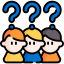

**Question**. Compare the classification performances of the models with and without weights. Sometimes the weighted case yields worse performances than the un-weighted case.

Why do you think this could be the case and which would be the more realistic model?

# Cross-Validation

Up to this point, we’ve been using a portion of the dataset for training (`train`) and a separate portion for evaluation (`test`). This is commonly known as the **holdout method**.

However, this approach can lead to problems when we want to compare multiple models or tune hyperparameters to select the best-performing one. For example, we might evaluate different classifiers (e.g., k-Nearest Neighbors, Decision Trees, Neural Networks) or the same model with different hyperparameters.

If we continuously tune and evaluate models using the same test split, we risk selecting the model that performs best **only on that specific test set**, but not necessarily on new, unseen data. This is known as **overfitting to the test set**, because we are optimizing our model choices based on that fixed test partition.

To address this issue, we use a more robust evaluation method called **cross-validation**.
<div>
<img src="attachment:grid_search_cross_validation.png" width="600">
</div>

In cross-validation, the available dataset is split into **K folds**, allowing us to create K different combinations of training and validation sets.



---

## Cross-Validation in Scikit-learn

We will now explore how to perform cross-validation using Scikit-learn:  
[Scikit-learn Cross-Validation documentation](https://scikit-learn.org/1.3/modules/cross_validation.html)

Importantly, we’ll perform cross-validation on the `X_train` and `Y_train` sets (i.e., not using the test set during tuning), so we can still evaluate the final model fairly on `X_test` and `Y_test`.

---

## `cross_validate`

One of the simplest ways to run cross-validation in Scikit-learn is by using the function [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).

This function takes:
- A model (e.g., a classifier instance)
- The input features `X` and target variable `Y`
- The Cross-Validation strategy `cv`, usually specified in the function [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html).
- A performance metric via the `scoring` parameter (e.g., `'accuracy'`), or several ones defined in a dictionary.
- Since Cross-Validations are independent of each other, we can run them in parallel by specifying `n_jobs` larger than 1.

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer

# We define the number of folds we want to use for cross-validation:
n_cvs = 5
# Initialize the Random Forest Classifier
clf_cv = RandomForestClassifier(random_state=42,class_weight='balanced')

# Define custom cross-validation strategy
skf = StratifiedKFold(n_splits=n_cvs, shuffle=True, random_state=42)

# Define scoring metrics
cohen_kappa_scorer = make_scorer(cohen_kappa_score)
scoring = {'accuracy':'accuracy',
           'precision_macro':'precision_macro',
           'recall_macro':'recall_macro',
           'f1_macro':'f1_macro',
           'cohen_kappa':cohen_kappa_scorer}

# Perform cross-validation
results = cross_validate(clf_cv, X, y, cv=skf, scoring=scoring,n_jobs=2)

# Print results
for metric in scoring:
    print(f"Mean {metric}: {results[f'test_{metric}'].mean()}")

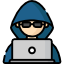

**Exercise**.

a) Play with the number of Cross-Validation folds.
Or, if you consider yourself a pro, make a table and/or a plot with the results of different folds (2, 5, 10, 20) and the corresponding metrics.
Do performance metrics improve with more folds? Do more folds lead to *better* performances?

b) What's the minimum number of folds you can use? And the maximum?

c) You may get an UndefinedMetricWarning while playing with the number of folds? Why could this be?

---
We can even go full-overboard and use a cross-validation with a weighted random forest!!! :O

In [ ]:
# Weighted Random Forest with cross-validation
n_cvs = 5
# Get the class weights
from sklearn.utils.class_weight import compute_class_weight
labels = np.unique(y)
n_labels = labels.shape[0]
class_weights = compute_class_weight('balanced', classes=labels, y=y)
# Create a dictionary mapping class labels to weights
class_weight_dict = {c: class_weights[i] for c,i in zip(labels,range(n_labels))}
# Initialize the Random Forest Classifier with class weights
clf_cvw = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)
# Define custom cross-validation strategy
skf = StratifiedKFold(n_splits=n_cvs, shuffle=True, random_state=42)
# Same metrics as before
# Perform cross-validation
results = cross_validate(clf_cvw, X, y, cv=skf, scoring=scoring,n_jobs=2)
# Print results
for metric in scoring:
    print(f"Mean {metric}: {results[f'test_{metric}'].mean()}")

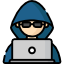

**Exercise (for home or if there's time). A Cross-Validation to rule them all.**

One topic we have not touched upon is the rather "extreme" case of the **Leave-One-Out Cross-Validation** (LOOCV). In this case, we use all samples but one to train the model and test it on the left-out sample. This is repeated for all samples, so we end up with as many models as samples. This is a very computationally expensive method, but it can be useful when we have very few samples. By using all samples but one, we can get a better estimate of the model's performance because the model has seen almost all samples. Check the documentation from sklearn on [LeaveOneOut](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html) and implement it for the Random Forest Classifier. You will need to use a for loop to iterate over each of the samples that have been left out.

**Extra-pro exercise**. Use LOOCV with the weighted random forest classifier.

## XGBoost

`xgboost` is a very powerful package for classification using boosted trees. It works very similarly to `sklearn` overall and we can implement it by following the same process we have used:
1. Initialize the model.
2. Fit the model on training data.
3. Make predictions on the testing data.

In [ ]:
# Import XGBoost's classifier function:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

# 1. Initialize XGBClassifier
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    eval_metric='mlogloss',
    random_state=42,
    tree_method = "hist",
)

# We need to adapt the labels because XGBoost only takes integers:
map_labels = {'Luminal A':0, 'Luminal B':1, 'Basal-like':2, 'HER2-enriched':3}
y_train_xgb = y_train.map(map_labels)
y_test_xgb = y_test.map(map_labels)
# Compute sample weights
weights_train = compute_sample_weight('balanced', y_train_xgb)
xgb.fit(
    X_train,
    y_train_xgb,
    sample_weight=weights_train
    )
xgb_pred = xgb.predict(X_test)
print("Cohen's Kappa",cohen_kappa_score(y_test_xgb, xgb_pred))
print("XGBoost Classification Report:")
print(classification_report(y_test_xgb, xgb_pred))

### XGboost on a GPU
`xgboost` allows for the use of GPUs to accelerate training! By setting the `device` parameter to `"cuda"` we can train our model using a GPU.

In [ ]:
# Use xgboost with a gpu:
# !pip install xgboost --upgrade --user
from xgboost import XGBClassifier
xgb_gpu = XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    eval_metric='mlogloss',
    random_state=42,
    tree_method = "hist",
    device = "cuda",     # Use GPU for training
)
xgb_gpu.fit(
    X_train,
    y_train_xgb,
    sample_weight=weights_train
    )
xgb_gpu_pred = xgb_gpu.predict(X_test)
print("Cohen's Kappa",cohen_kappa_score(y_test_xgb, xgb_gpu_pred))
print("XGBoost GPU Classification Report:")
print(classification_report(y_test_xgb, xgb_gpu_pred))

### Cross-Validation

You can of course also use `xgboost` with Cross-Validation and, also, perform a weighted classification. Here we have to use `cross_val_predict` to implement the Cross-Validation and get the performance metrics in a slightly different way. This is because the loss used to monitor boosted trees training are not compatible with those used in random forest.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.utils.class_weight import compute_sample_weight

# Map labels to integers for XGBoost
map_labels = {'Luminal A': 0, 'Luminal B': 1, 'Basal-like': 2, 'HER2-enriched': 3}
y_mapped = y.map(map_labels)

# Compute sample weights
sample_weights = compute_sample_weight('balanced', y_mapped)

# Initialize XGBoost classifier
xgb = XGBClassifier(
    objective='multi:softmax',  # Use 'multi:softprob' for probabilities
    num_class=4,               # Number of classes
    eval_metric='mlogloss',    # Evaluation metric
    random_state=42
)

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation predictions, taking class weights into account:
y_pred = cross_val_predict(xgb, X, y_mapped, cv=skf,params={'sample_weight': sample_weights})

# Calculate metrics
accuracy = accuracy_score(y_mapped, y_pred)
precision_macro = precision_score(y_mapped, y_pred, average='macro')
recall_macro = recall_score(y_mapped, y_pred, average='macro')
f1_macro = f1_score(y_mapped, y_pred, average='macro')
cohen_kappa = cohen_kappa_score(y_mapped, y_pred)

# Print mean metrics
print(f"Mean Accuracy: {accuracy:.4f}")
print(f"Mean Precision (Macro): {precision_macro:.4f}")
print(f"Mean Recall (Macro): {recall_macro:.4f}")
print(f"Mean F1 Score (Macro): {f1_macro:.4f}")
print(f"Mean Cohen's Kappa: {cohen_kappa:.4f}")

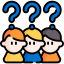

**Question**. We mentioned boosted trees are very powerful, but the performances of running `xgboost` with Cross-Validation are rather poor, especially compared to the case of Random Forest. Why could this be? Think in terms of the algorithms we saw in class. Recall that CV means that each trained model, which are independent of each other, see very few available samples.